In [13]:
# setup
om.defaults.OMEGA_RESTAPI_URL = 'http://localhost:8000'
import pandas as pd
%matplotlib inline

In [14]:
# show datasets
om.datasets.list()

[u'google', u'sample/test', u'test']

In [5]:
om.models.list()

[u'google-predict']

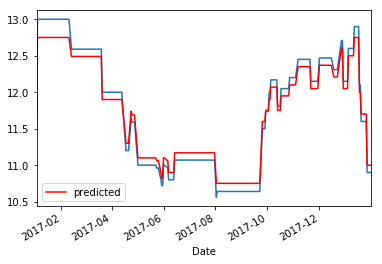

In [6]:
# get model and predict locally
prices = om.datasets.get('google')
model = om.models.get('google-predict')
X = prices.reset_index()[['Date']].astype(int)
predicted = model.predict(X)

# display results
predicted = pd.DataFrame({'predicted': predicted}, index=prices.index)
ax = prices['Close'].plot()
predicted.plot(color='red', ax=ax)

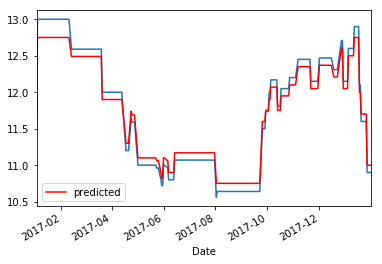

In [7]:
# predict on the cluster
result = om.runtime.model('google-predict').predict(X)

# display results
yhat = result.get()
yhat = pd.DataFrame({'predicted': yhat}, index=prices.index)
ax = prices['Close'].plot()
yhat.plot(color='red', ax=ax)

In [11]:
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 1, 31)
f = web.DataReader("F", 'google', start, end)
f.shape

(272, 5)

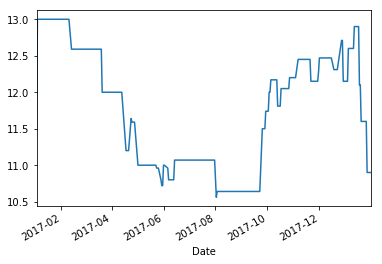

In [12]:
f['Close'].plot()

In [29]:
om.datasets.put(f, 'google')

<Metadata: Metadata(kind=pandas.dfrows,name=google,kind_meta={'dtypes': {'High': 'float64', 'Volume': 'int64', '_idx#0_Date': 'datetime64[ns]', 'Low': 'float64', 'Close': 'float64', 'Open': 'float64'}, 'columns': {'High': 'High', 'Volume': 'Volume', '_idx#0_Date': '_idx#0_Date', 'Low': 'Low', 'Close': 'Close', 'Open': 'Open'}, 'idx_meta': {'names': ['Date']}},gridfile=<GridFSProxy: (no file)>,created=2018-01-31 22:17:54.797503,bucket=omegaml,uri=None,collection=omegaml.data_.google.datastore,prefix=data/,s3file={},attributes={},id=5a724092de39d15d4afba969,objid=None)>

om.datasets.get('google')

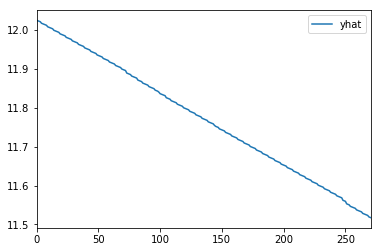

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

X, y = f.reset_index()[['Date']].astype(int), f['Close']

lm = LinearRegression()
lm.fit(X, y)
r2 = lm.score(X, y)

pd.DataFrame({'yhat': lm.predict(X)}).plot()

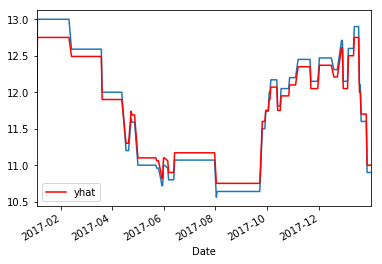

In [78]:
from sklearn.svm import SVR

X, y = f.reset_index()[['Date']].astype(int), f['Close']

lm = SVR()
lm.fit(X, y)

r2 = lm.score(X, y)
yhat = pd.DataFrame({'yhat': lm.predict(X)})
yhat.index = f.index

ax = f['Close'].plot()
yhat.plot(color='r', ax=ax)


In [79]:
om.models.put(lm, 'google-predict')

<Metadata: Metadata(kind=sklearn.joblib,name=google-predict,kind_meta={},gridfile=<GridFSProxy: omegaml.models_.google-predict.omm>,created=2018-01-31 22:32:33.012392,bucket=omegaml,uri=None,collection=None,prefix=models/,s3file={},attributes={},id=5a724401de39d15d4afba96d,objid=None)>

In [43]:
f.index.shape, f['Close'].shape

((272,), (272,))